# State observer examples

This notebook relies on the Python code stored in the folder python.

In [1]:
#Import base libraries
import numpy as np
import matplotlib.pyplot as plt
import random
from matplotlib import animation, rc
from IPython.display import HTML
import importlib

In [2]:
# Import libraries for the examples
import os
import sys
module_path = os.path.abspath(os.path.join('../python'))
if module_path not in sys.path:
    sys.path.append(module_path)

In [4]:
# Set plotting options
%matplotlib inline
plt.style.use(['seaborn-darkgrid', 'seaborn-poster'])

# make animation show in notebook
rc('animation', html='html5')
rc('text', usetex=True)

In [5]:
import simplified_models
import utils
from utils import Coordinate2d
from utils import GenerateBaseSimulation
import display_utils as du

In [6]:
# if needed...
#importlib.reload(du)
#importlib.reload(utils)
#from utils import Coordinate2d
#from utils import GenerateBaseSimulation

In [7]:
# Initialize random number generator
random.seed(0)

# Exponential decay scalar case

This section shows the exponential decay at different rate. If the value of the base is negative, over time the function tends to 0, but it oscillates between positive and negative values.

In [8]:
time_vector = np.arange(0, 25, 1)
l_value = (0.9, 0.7, 0.1, -0.7)

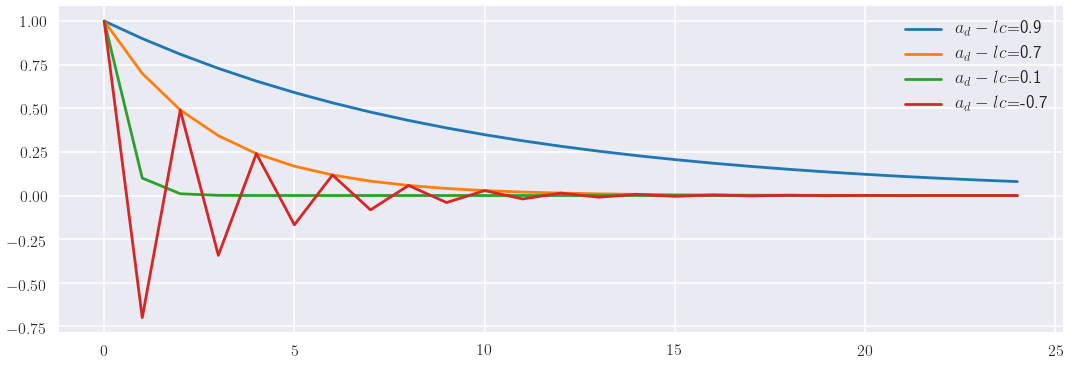

In [9]:
plt.figure(figsize=(18, 6))
for i_l in l_value:
    plt.plot(time_vector, i_l**time_vector, label="$a_d-lc$={}".format(i_l))
plt.legend(prop={'size':18})
#plt.title("Examples of L^t")
#plt.xlabel("Time step", fontsize=18)

# Observer example no feedback from output

In [10]:
n_samples = 25
sample_time = 0.1

In [11]:
# True model
initial_position = Coordinate2d(2, 3)
initial_speed = Coordinate2d(10, 15)
true_model = simplified_models.TrueModel(initial_position, initial_speed, sample_time)

In [12]:
# Estimator
initial_position_estimation = Coordinate2d(0, 0)
initial_speed_estimation = Coordinate2d(0, 0)
observer_gain = [
    [0, 0],
    [0, 0],
    [0, 0],
    [0, 0]
]
sample_time = 0.1
observer = simplified_models.Observer(initial_position_estimation, initial_speed_estimation, sample_time, observer_gain)

In [13]:
# generate input for the system
acceleration = [Coordinate2d(random.uniform(0, 5), random.uniform(-5, 0)) for i in range(n_samples)]

In [14]:
simulation1 = GenerateBaseSimulation(true_model, observer, acceleration)

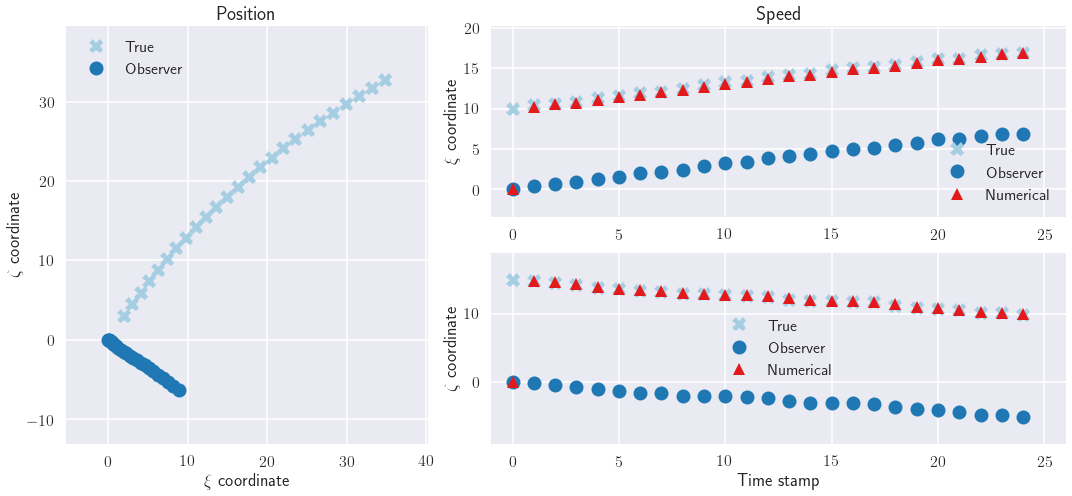

In [15]:
fig=plt.figure(figsize=(15, 7))
ax1 = plt.subplot2grid((2,5), (0,0), rowspan=2, colspan=2)
ax1.axis('equal')
ax2 = plt.subplot2grid((2,5), (0,2), colspan=3, autoscale_on=True)
ax3 = plt.subplot2grid((2,5), (1,2), colspan=3, autoscale_on=True)

du.generate_base_figure(simulation1, ax1, ax2, ax3)
ax1.legend()
ax2.legend()
ax3.legend()
fig.tight_layout()

# Observer feedback from output

In [16]:
observer_gain = [
    [0.5, 0],
    [0.5, 0],
    [0, 0.3],
    [0, 0.3]
]
true_model = simplified_models.TrueModel(initial_position, initial_speed, sample_time)
observer = simplified_models.Observer(initial_position_estimation, initial_speed_estimation, sample_time, observer_gain)
simulation1 = GenerateBaseSimulation(true_model, observer, acceleration)

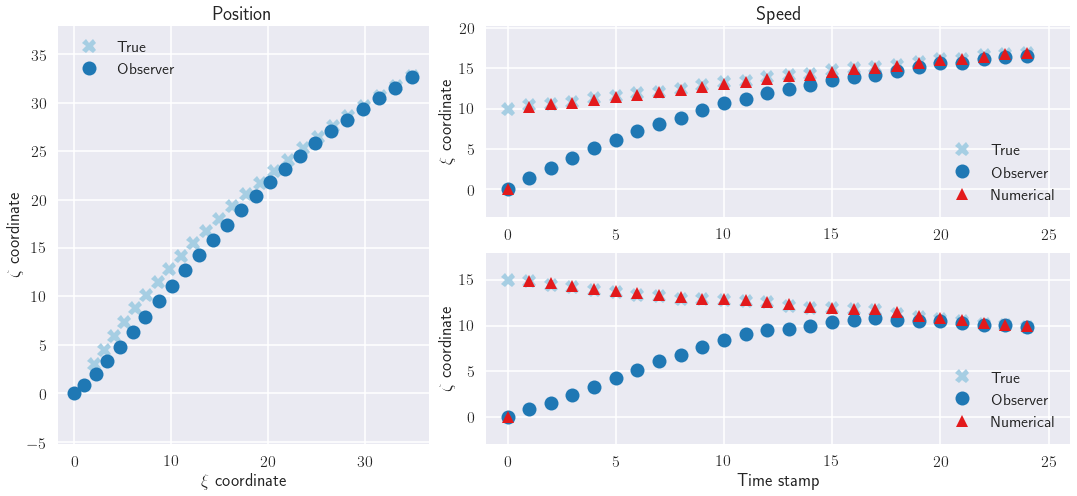

In [17]:
fig=plt.figure(figsize=(15, 7))
ax1 = plt.subplot2grid((2,5), (0,0), rowspan=2, colspan=2)
ax1.axis('equal')
ax2 = plt.subplot2grid((2,5), (0,2), colspan=3, autoscale_on=True)
ax3 = plt.subplot2grid((2,5), (1,2), colspan=3, autoscale_on=True)

du.generate_base_figure(simulation1, ax1, ax2, ax3)
ax1.legend()
ax2.legend()
ax3.legend()
fig.tight_layout()

# Measurement noise in the position of the car

In [18]:
position_noise = [Coordinate2d(random.uniform(-2, 2), random.gauss(0, 1)) for i in range(n_samples)]
true_model = simplified_models.TrueModel(initial_position, initial_speed, sample_time)
observer = simplified_models.Observer(initial_position_estimation, initial_speed_estimation, sample_time, observer_gain)
simulation1 = GenerateBaseSimulation(true_model, observer, acceleration, output_noise=position_noise)

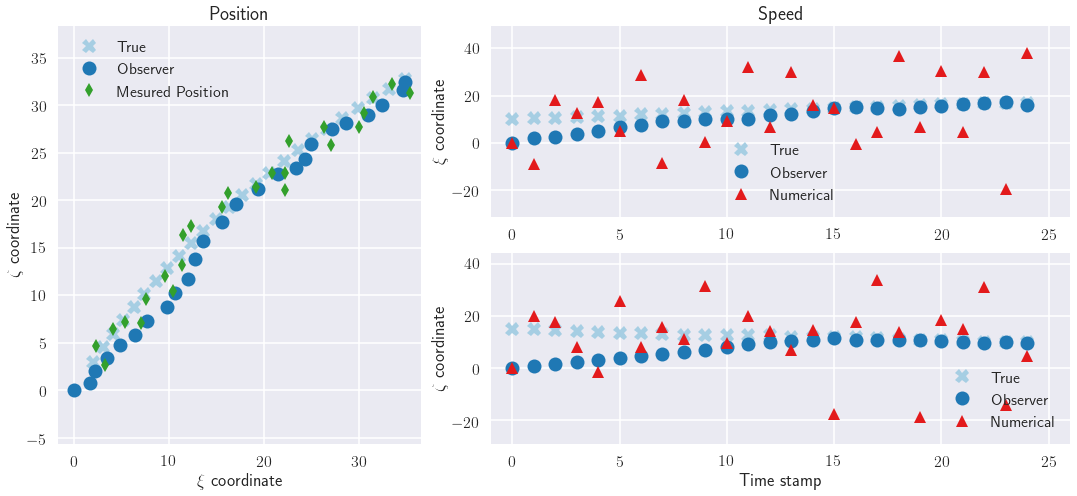

In [19]:
fig=plt.figure(figsize=(15, 7))
ax1 = plt.subplot2grid((2,5), (0,0), rowspan=2, colspan=2)
ax1.axis('equal')
ax2 = plt.subplot2grid((2,5), (0,2), colspan=3, autoscale_on=True)
ax3 = plt.subplot2grid((2,5), (1,2), colspan=3, autoscale_on=True)

du.generate_base_figure(simulation1, ax1, ax2, ax3, plot_measured_position=True)
ax1.legend()
ax2.legend()
ax3.legend()
fig.tight_layout()

# Measurement noise in the position of the car and in the acceleration

In [20]:
input_noise = [Coordinate2d(random.uniform(-2, 2), random.gauss(0, 1)) for i in range(n_samples)]
true_model = simplified_models.TrueModel(initial_position, initial_speed, sample_time)
observer = simplified_models.Observer(initial_position_estimation, initial_speed_estimation, sample_time, observer_gain)
simulation1 = GenerateBaseSimulation(true_model, observer, acceleration, 
                                     output_noise=position_noise, input_noise=input_noise)

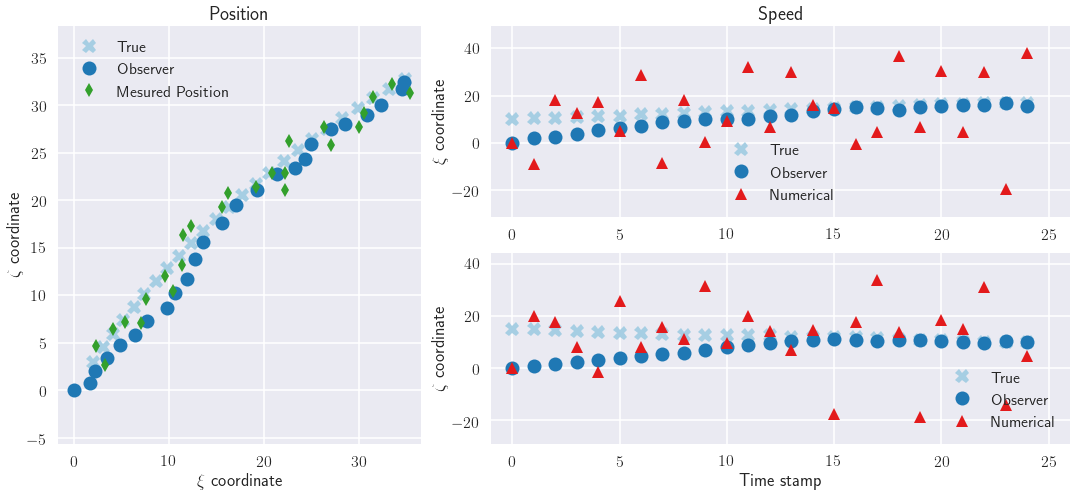

In [21]:
fig=plt.figure(figsize=(15, 7))
ax1 = plt.subplot2grid((2,5), (0,0), rowspan=2, colspan=2)
ax1.axis('equal')
ax2 = plt.subplot2grid((2,5), (0,2), colspan=3, autoscale_on=True)
ax3 = plt.subplot2grid((2,5), (1,2), colspan=3, autoscale_on=True)

du.generate_base_figure(simulation1, ax1, ax2, ax3, plot_measured_position=True)
ax1.legend()
ax2.legend()
ax3.legend()
fig.tight_layout()